In [363]:
import datetime
import pandas as pd
import numpy as np
import math
from datetime import date, timedelta
from matplotlib import pyplot as plt
import scipy.stats

In [50]:
df = pd.read_csv("1992_ensemble_pcp_sep.csv", sep=" ")

In [51]:
df

Latitude, Longitude,  Value,  \
NaN       NaN        NaN    32.500 NaN           NaN     71.750     0.0   
Latitude, Longitude, Value, date,  time,  stepRange,  shortName     NaN   
NaN       NaN        NaN    32.500 NaN           NaN     71.750     0.0   
Latitude, Longitude, Value, date,  time,  stepRange,  shortName     NaN   
NaN       NaN        NaN    32.500 NaN           NaN     71.750     0.0   
...                                              ...        ...     ...   
                                   NaN           NaN     71.750     0.0   
Latitude, Longitude, Value, date,  time,  stepRange,  shortName     NaN   
NaN       NaN        NaN    32.500 NaN           NaN     71.750     0.0   
Latitude, Longitude, Value, date,  time,  stepRange,  shortName     NaN   
NaN       NaN        NaN    32.500 NaN           NaN     71.750     0.0   

                                               date,   time, stepRange,  \
NaN       NaN        NaN    32.500 NaN    19920831.0  1800.0        3-6   
Latitude, Longitude, Value, date,  time,         NaN     NaN        NaN   
NaN       NaN        NaN    32.500 NaN    19920831.0  1800.0        3-6   
Latitude, Longitude, Value, date,  time,         NaN     NaN        NaN   
NaN       NaN        NaN    32.500 NaN    19920831.0  1800.0        3-6   
...                                              ...     ...        ...   
                                   NaN    19920930.0  1800.0        0-3   
Latitude, Longitude, Value, date,  time,         NaN     NaN        NaN   
NaN       NaN        NaN    32.500 NaN    19920930.0  1800.0        0-3   
Latitude, Longitude, Value, date,  time,         NaN     NaN        NaN   
NaN       NaN        NaN    32.500 NaN    19920930.0  1800.0        0-3   

                                         shortName  
NaN       NaN        NaN    32.500 NaN          tp  
Latitude, Longitude, Value, date,  time,       NaN  
NaN       NaN        NaN    32.500 NaN          tp  
Latitude, Longitude, Value, date,  time,       NaN  
NaN       NaN        NaN    32.500 NaN          tp  
...                                            ...  
                                   NaN          tp  
Latitude, Longitude, Value, date,  time,       NaN  
NaN       NaN        NaN    32.500 NaN          tp  
Latitude, Longitude, Value, date,  time,       NaN  
NaN       NaN        NaN    32.500 NaN          tp  

[4799 rows x 7 columns]

In [52]:
df = df[df["Longitude,"]=='71.750']

In [135]:
df = df[10:]

In [159]:
df_dates = df[20:]

In [185]:
df.head(80)

Latitude, Longitude,        Value,       date,   time,  \
NaN NaN NaN 32.500 NaN       NaN     71.750  0.000000e+00  19920831.0  1800.0   
                   NaN       NaN     71.750  0.000000e+00  19920831.0  1800.0   
                   NaN       NaN     71.750  0.000000e+00  19920831.0  1800.0   
                   NaN       NaN     71.750  4.768384e-06  19920831.0  1800.0   
                   NaN       NaN     71.750  3.957759e-05  19920831.0  1800.0   
...                          ...        ...           ...         ...     ...   
                   NaN       NaN     71.750  4.768383e-05  19920901.0  1800.0   
                   NaN       NaN     71.750  4.196177e-05  19920901.0  1800.0   
                   NaN       NaN     71.750  1.096728e-05  19920901.0  1800.0   
                   NaN       NaN     71.750  4.291546e-05  19920901.0  1800.0   
                   NaN       NaN     71.750  4.768384e-07  19920901.0  1800.0   

                       stepRange, shortName  
NaN NaN NaN 32.500 NaN        6-9        tp  
                   NaN        6-9        tp  
                   NaN        6-9        tp  
                   NaN        6-9        tp  
                   NaN        6-9        tp  
...                           ...       ...  
                   NaN        3-6        tp  
                   NaN        3-6        tp  
                   NaN        3-6        tp  
                   NaN        3-6        tp  
                   NaN        3-6        tp  

[80 rows x 7 columns]

In [167]:
df_dates

Latitude, Longitude,    Value,       date,   time,  \
NaN NaN NaN 32.500 NaN       NaN     71.750  0.000047  19920901.0   600.0   
                   NaN       NaN     71.750  0.000028  19920901.0   600.0   
                   NaN       NaN     71.750  0.000019  19920901.0   600.0   
                   NaN       NaN     71.750  0.000052  19920901.0   600.0   
                   NaN       NaN     71.750  0.000001  19920901.0   600.0   
...                          ...        ...       ...         ...     ...   
                   NaN       NaN     71.750  0.000000  19920930.0  1800.0   
                   NaN       NaN     71.750  0.000000  19920930.0  1800.0   
                   NaN       NaN     71.750  0.000000  19920930.0  1800.0   
                   NaN       NaN     71.750  0.000000  19920930.0  1800.0   
                   NaN       NaN     71.750  0.000000  19920930.0  1800.0   

                       stepRange, shortName  
NaN NaN NaN 32.500 NaN        0-3        tp  
                   NaN        0-3        tp  
                   NaN        0-3        tp  
                   NaN        0-3        tp  
                   NaN        0-3        tp  
...                           ...       ...  
                   NaN        0-3        tp  
                   NaN        0-3        tp  
                   NaN        0-3        tp  
                   NaN        0-3        tp  
                   NaN        0-3        tp  

[2370 rows x 7 columns]

In [155]:
df.loc[df['date,'] == 19920902.0]

Latitude, Longitude,    Value,       date,   time,  \
NaN NaN NaN 32.500 NaN       NaN     71.750  0.000492  19920902.0   600.0   
                   NaN       NaN     71.750  0.000072  19920902.0   600.0   
                   NaN       NaN     71.750  0.000569  19920902.0   600.0   
                   NaN       NaN     71.750  0.000146  19920902.0   600.0   
                   NaN       NaN     71.750  0.003123  19920902.0   600.0   
...                          ...        ...       ...         ...     ...   
                   NaN       NaN     71.750  0.000596  19920902.0  1800.0   
                   NaN       NaN     71.750  0.000698  19920902.0  1800.0   
                   NaN       NaN     71.750  0.007483  19920902.0  1800.0   
                   NaN       NaN     71.750  0.007765  19920902.0  1800.0   
                   NaN       NaN     71.750  0.005683  19920902.0  1800.0   

                       stepRange, shortName  
NaN NaN NaN 32.500 NaN        0-3        tp  
                   NaN        0-3        tp  
                   NaN        0-3        tp  
                   NaN        0-3        tp  
                   NaN        0-3        tp  
...                           ...       ...  
                   NaN       9-12        tp  
                   NaN       9-12        tp  
                   NaN       9-12        tp  
                   NaN       9-12        tp  
                   NaN       9-12        tp  

[80 rows x 7 columns]

In [166]:
ef1 = [0]
ef2 = [0]
ef3 = [0]
ef4 = [0]
ef5 = [0]
ef6 = [0]
ef7 = [0]
ef8 = [0]
ef9 = [0]
ef10 = [0]
dates = []

In [165]:
df_dates.iloc[0,3]

19920901.0

In [138]:
2389%10

9

In [168]:
for j in range(2390):
    if j%10 == 0:
        ef1.append(df.iloc[j,2])
    if j%10 == 1:
        ef2.append(df.iloc[j,2])
    if j%10 == 2:
        ef3.append(df.iloc[j,2])
    if j%10 == 3:
        ef4.append(df.iloc[j,2])
    if j%10 == 4:
        ef5.append(df.iloc[j,2])
    if j%10 == 5:
        ef6.append(df.iloc[j,2])
    if j%10 == 6:
        ef7.append(df.iloc[j,2])
    if j%10 == 7:
        ef8.append(df.iloc[j,2])
    if j%10 == 8:
        ef9.append(df.iloc[j,2])
    if j%10 == 9:
        ef10.append(df.iloc[j,2])
    if j%80 == 0:
        dates.append(df_dates.iloc[j,3])
    

In [202]:
ef1_d = []
ef2_d = []
ef3_d = []
ef4_d = []
ef5_d = []
ef6_d = []
ef7_d = []
ef8_d = []
ef9_d = []
ef10_d = []

In [203]:
for i in range(30):
    a = i*8
    ef1_d.append((np.array(ef1[a:a+8]).sum())*1000)
    ef2_d.append((np.array(ef2[a:a+8]).sum())*1000)
    ef3_d.append((np.array(ef3[a:a+8]).sum())*1000)
    ef4_d.append((np.array(ef4[a:a+8]).sum())*1000)
    ef5_d.append((np.array(ef5[a:a+8]).sum())*1000)
    ef6_d.append((np.array(ef6[a:a+8]).sum())*1000)
    ef7_d.append((np.array(ef7[a:a+8]).sum())*1000)
    ef8_d.append((np.array(ef8[a:a+8]).sum())*1000)
    ef9_d.append((np.array(ef9[a:a+8]).sum())*1000)
    ef10_d.append((np.array(ef10[a:a+8]).sum())*1000)


In [244]:
start_dt = date(1992, 9, 1)
end_dt = date(1992, 9, 30)

# difference between current and previous date
delta = timedelta(days=1)

# store the dates between two dates in a list
dr = []

while start_dt <= end_dt:
    # add current date to list by converting  it to iso format
    dr.append(start_dt)
    # increment start date by timedelta
    start_dt += delta

print('Dates between', start_dt, 'and', end_dt)
np.size(dr)

Dates between 1992-10-01 and 1992-09-30


30

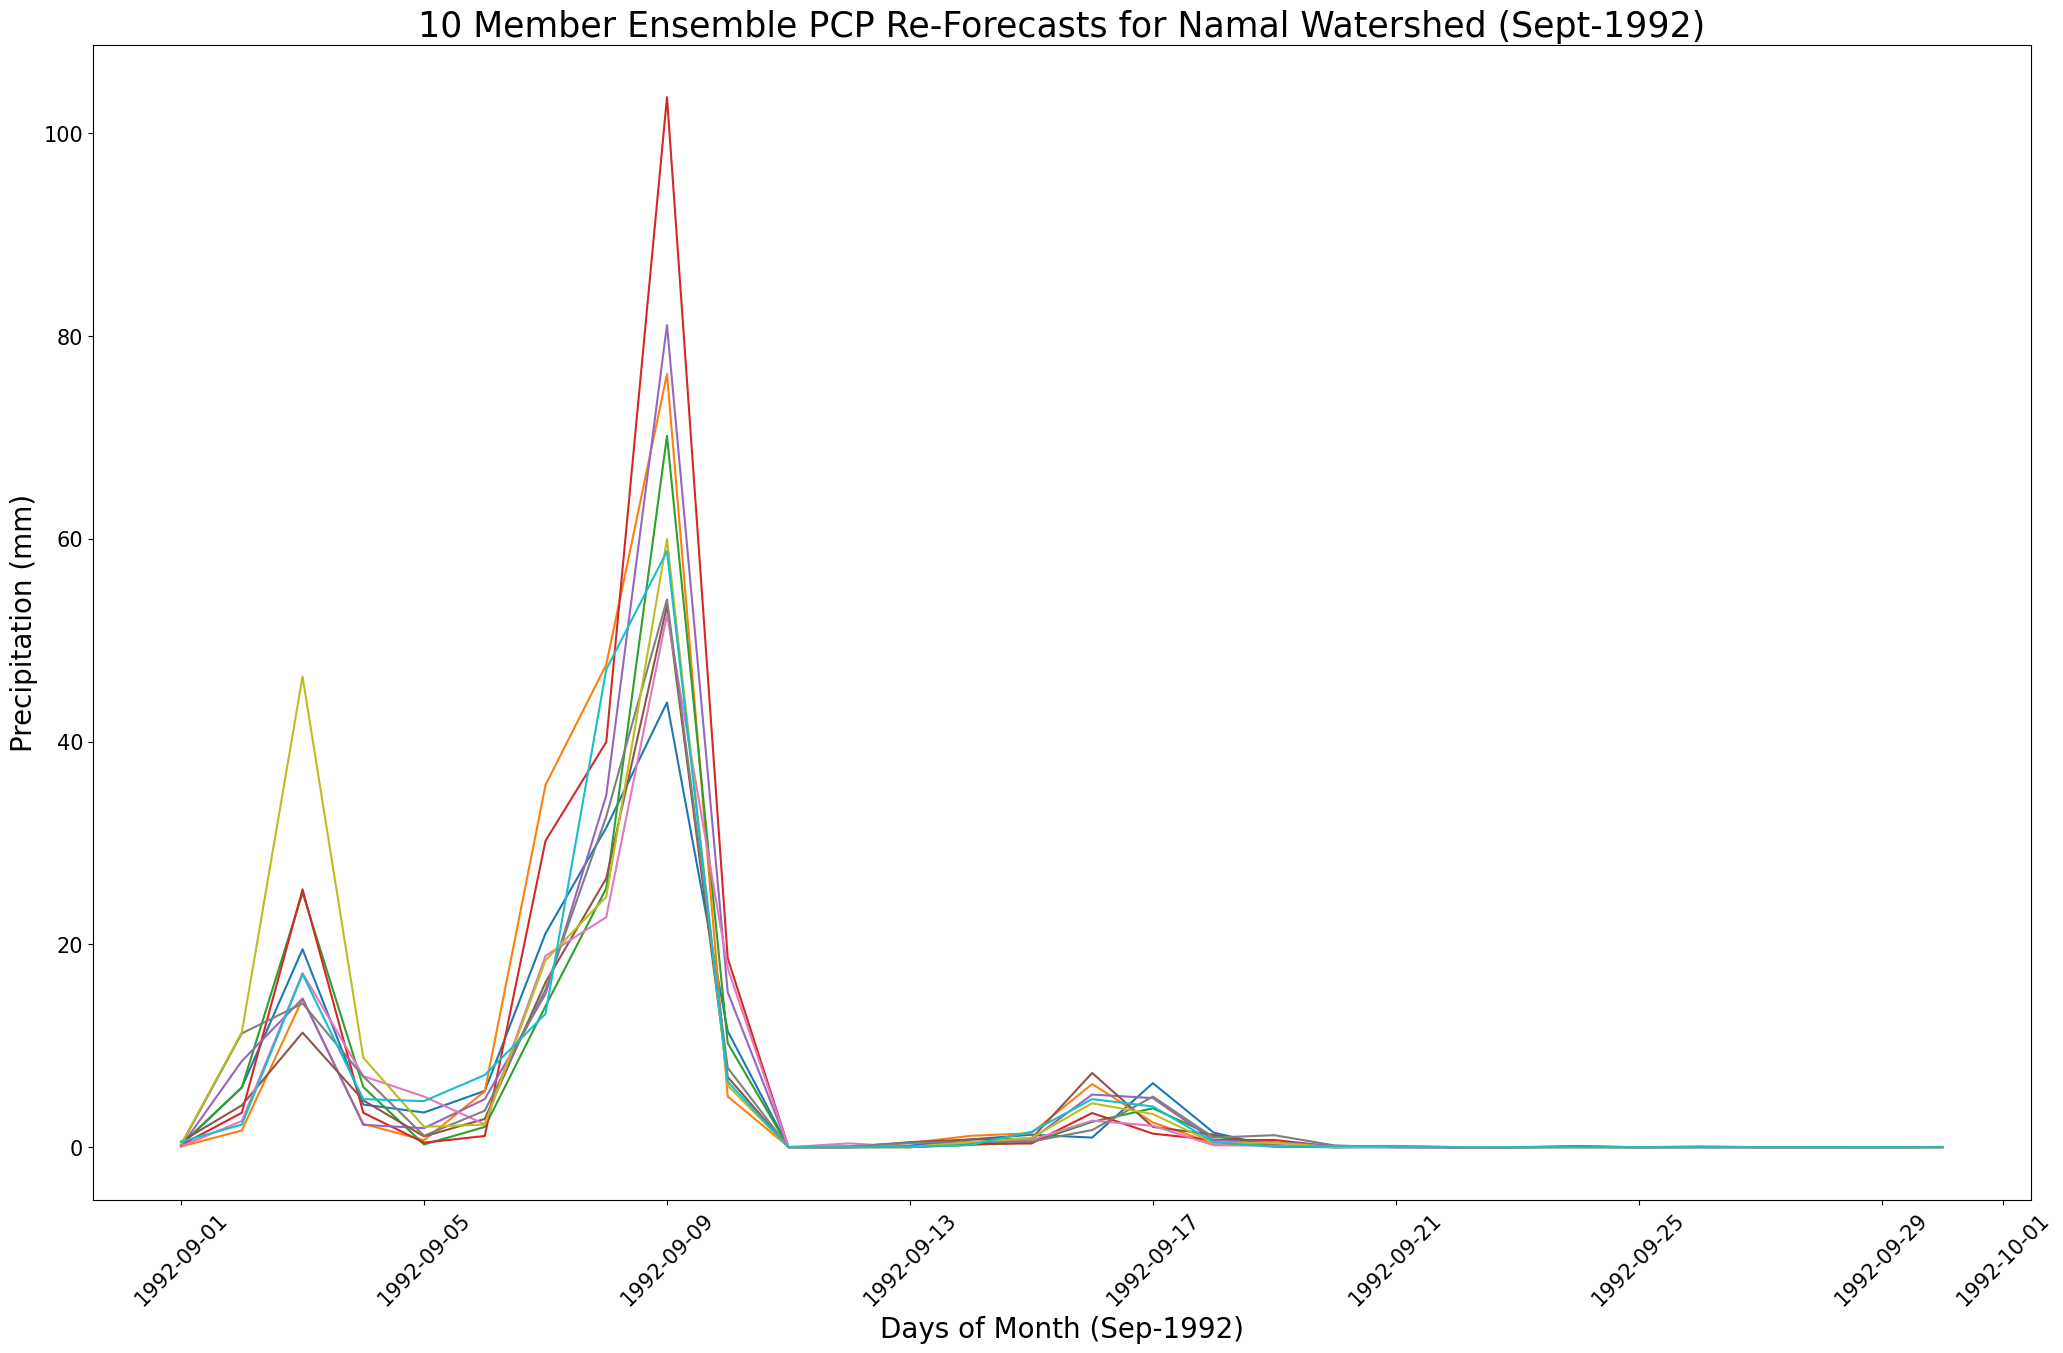

In [265]:
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(15)
plt.plot(dr,ef1_d)
plt.plot(dr,ef2_d)
plt.plot(dr,ef3_d)
plt.plot(dr,ef4_d)
plt.plot(dr,ef5_d)
plt.plot(dr,ef6_d)
plt.plot(dr,ef7_d)
plt.plot(dr,ef8_d)
plt.plot(dr,ef9_d)
plt.plot(dr,ef10_d)

plt.xlabel("Days of Month (Sep-1992)", fontsize=20)
plt.ylabel("Precipitation (mm)", fontsize=20)
plt.title("10 Member Ensemble PCP Re-Forecasts for Namal Watershed (Sept-1992)", fontsize=25)

plt.xticks(rotation = 45, fontsize=15)
# plt.xticks(times.to_pydatetime())
# plt.locator_params(axis='x', nbins=10)
# plt.yticks(rotation = 45, fontsize=15)
plt.savefig('Ensemble Memeber.jpg', dpi=500);
plt.show()


In [267]:
Ensemble_scenarios = pd.DataFrame({'Date':dr,'Flo_1':ef1_d,'Flo_2':ef2_d,'Flo_3':ef3_d,'Flo_4':ef4_d,'Flo_5':ef5_d,'Flo_6':ef6_d,'Flo_7':ef7_d,'Flo_8':ef8_d,'Flo_9':ef9_d,'Flo_10':ef10_d})

In [268]:
Ensemble_scenarios

,Date,Flo_1,Flo_2,Flo_3,Flo_4,Flo_5,Flo_6,Flo_7,Flo_8,Flo_9,Flo_10
0,1992-09-01,0.186435,0.068665,0.239143,0.194996,0.046252,0.548829,0.068659,0.191652,0.295232,0.531647
1,1992-09-02,5.886052,1.648905,5.887103,3.394061,8.491929,4.125210,2.583626,11.221547,11.333932,2.230652
2,1992-09-03,19.521759,14.638622,25.088582,25.425349,14.658482,11.299262,17.166214,14.176385,46.409419,17.061997
3,1992-09-04,4.202646,2.303340,5.932490,3.386926,2.198702,4.616942,7.004809,6.971832,8.822996,4.736551
4,1992-09-05,3.420215,0.685203,0.265820,0.450009,1.875468,1.058020,4.990685,1.128057,2.012609,4.544067
5,1992-09-06,5.549614,5.512927,1.996625,1.098995,4.739711,2.783667,2.256626,3.591597,2.215343,7.117491
6,1992-09-07,21.084855,35.715939,13.908789,30.211666,15.109172,16.248381,18.870034,15.545989,18.423866,13.148702
7,1992-09-08,31.506301,47.591623,25.529163,39.953657,34.685286,26.514635,22.682435,32.604662,24.699230,47.113833
8,1992-09-09,43.860796,76.252398,70.154849,103.552916,81.071116,53.417217,52.519134,54.016087,59.973025,58.775185
9,1992-09-10,11.432913,5.003650,10.254886,18.624531,15.283320,6.917568,17.649910,7.826328,6.074280,6.455257


In [270]:
Ensemble_scenarios.loc[-1] = [date(1992, 8, 31),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0 ]  # adding a row
Ensemble_scenarios.index = Ensemble_scenarios.index + 1  # shifting index
Ensemble_scenarios.sort_index(inplace=True) 

In [276]:
Ensemble_scenarios

,Date,Flo_1,Flo_2,Flo_3,Flo_4,Flo_5,Flo_6,Flo_7,Flo_8,Flo_9,Flo_10
0,1992-08-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1992-09-01,0.186435,0.068665,0.239143,0.194996,0.046252,0.548829,0.068659,0.191652,0.295232,0.531647
2,1992-09-02,5.886052,1.648905,5.887103,3.394061,8.491929,4.125210,2.583626,11.221547,11.333932,2.230652
3,1992-09-03,19.521759,14.638622,25.088582,25.425349,14.658482,11.299262,17.166214,14.176385,46.409419,17.061997
4,1992-09-04,4.202646,2.303340,5.932490,3.386926,2.198702,4.616942,7.004809,6.971832,8.822996,4.736551
5,1992-09-05,3.420215,0.685203,0.265820,0.450009,1.875468,1.058020,4.990685,1.128057,2.012609,4.544067
6,1992-09-06,5.549614,5.512927,1.996625,1.098995,4.739711,2.783667,2.256626,3.591597,2.215343,7.117491
7,1992-09-07,21.084855,35.715939,13.908789,30.211666,15.109172,16.248381,18.870034,15.545989,18.423866,13.148702
8,1992-09-08,31.506301,47.591623,25.529163,39.953657,34.685286,26.514635,22.682435,32.604662,24.699230,47.113833
9,1992-09-09,43.860796,76.252398,70.154849,103.552916,81.071116,53.417217,52.519134,54.016087,59.973025,58.775185


In [297]:
med = []
for i in range(31):
    dum = []
    for j in range(10):
        dum.append(Ensemble_scenarios.iloc[i,j+1])
    med.append(np.median(np.array(dum)))
np.size(med)

31

In [284]:
mean = []
for i in range(31):
    sum = 0.0
    for j in range(10):
        sum = sum + Ensemble_scenarios.iloc[i,j+1]
    mean.append(sum/10)
np.size(mean)

31

In [289]:
std = []
var = []
for i in range(31):
    sum = 0.0
    for j in range(10):
        sum = sum + (Ensemble_scenarios.iloc[i,j+1]-mean[i])**2
    sum = sum/10
    var.append(sum)
    sum = math.sqrt(sum)
    std.append(sum)

In [325]:
upper = []
upper2 = []
upper3 = []
lower = []
lower2 = []
lower3 = []
for i in range(31):
    upper.append(mean[i]+std[i])
    lower.append(max(0,mean[i]-std[i]))
    upper2.append(mean[i]+std[i]+std[i])
    lower2.append(max(0,mean[i]-std[i]-std[i]))
    upper3.append(mean[i]+std[i]+std[i]+std[i])
    lower3.append(max(0,mean[i]-std[i]-std[i]-std[i]))

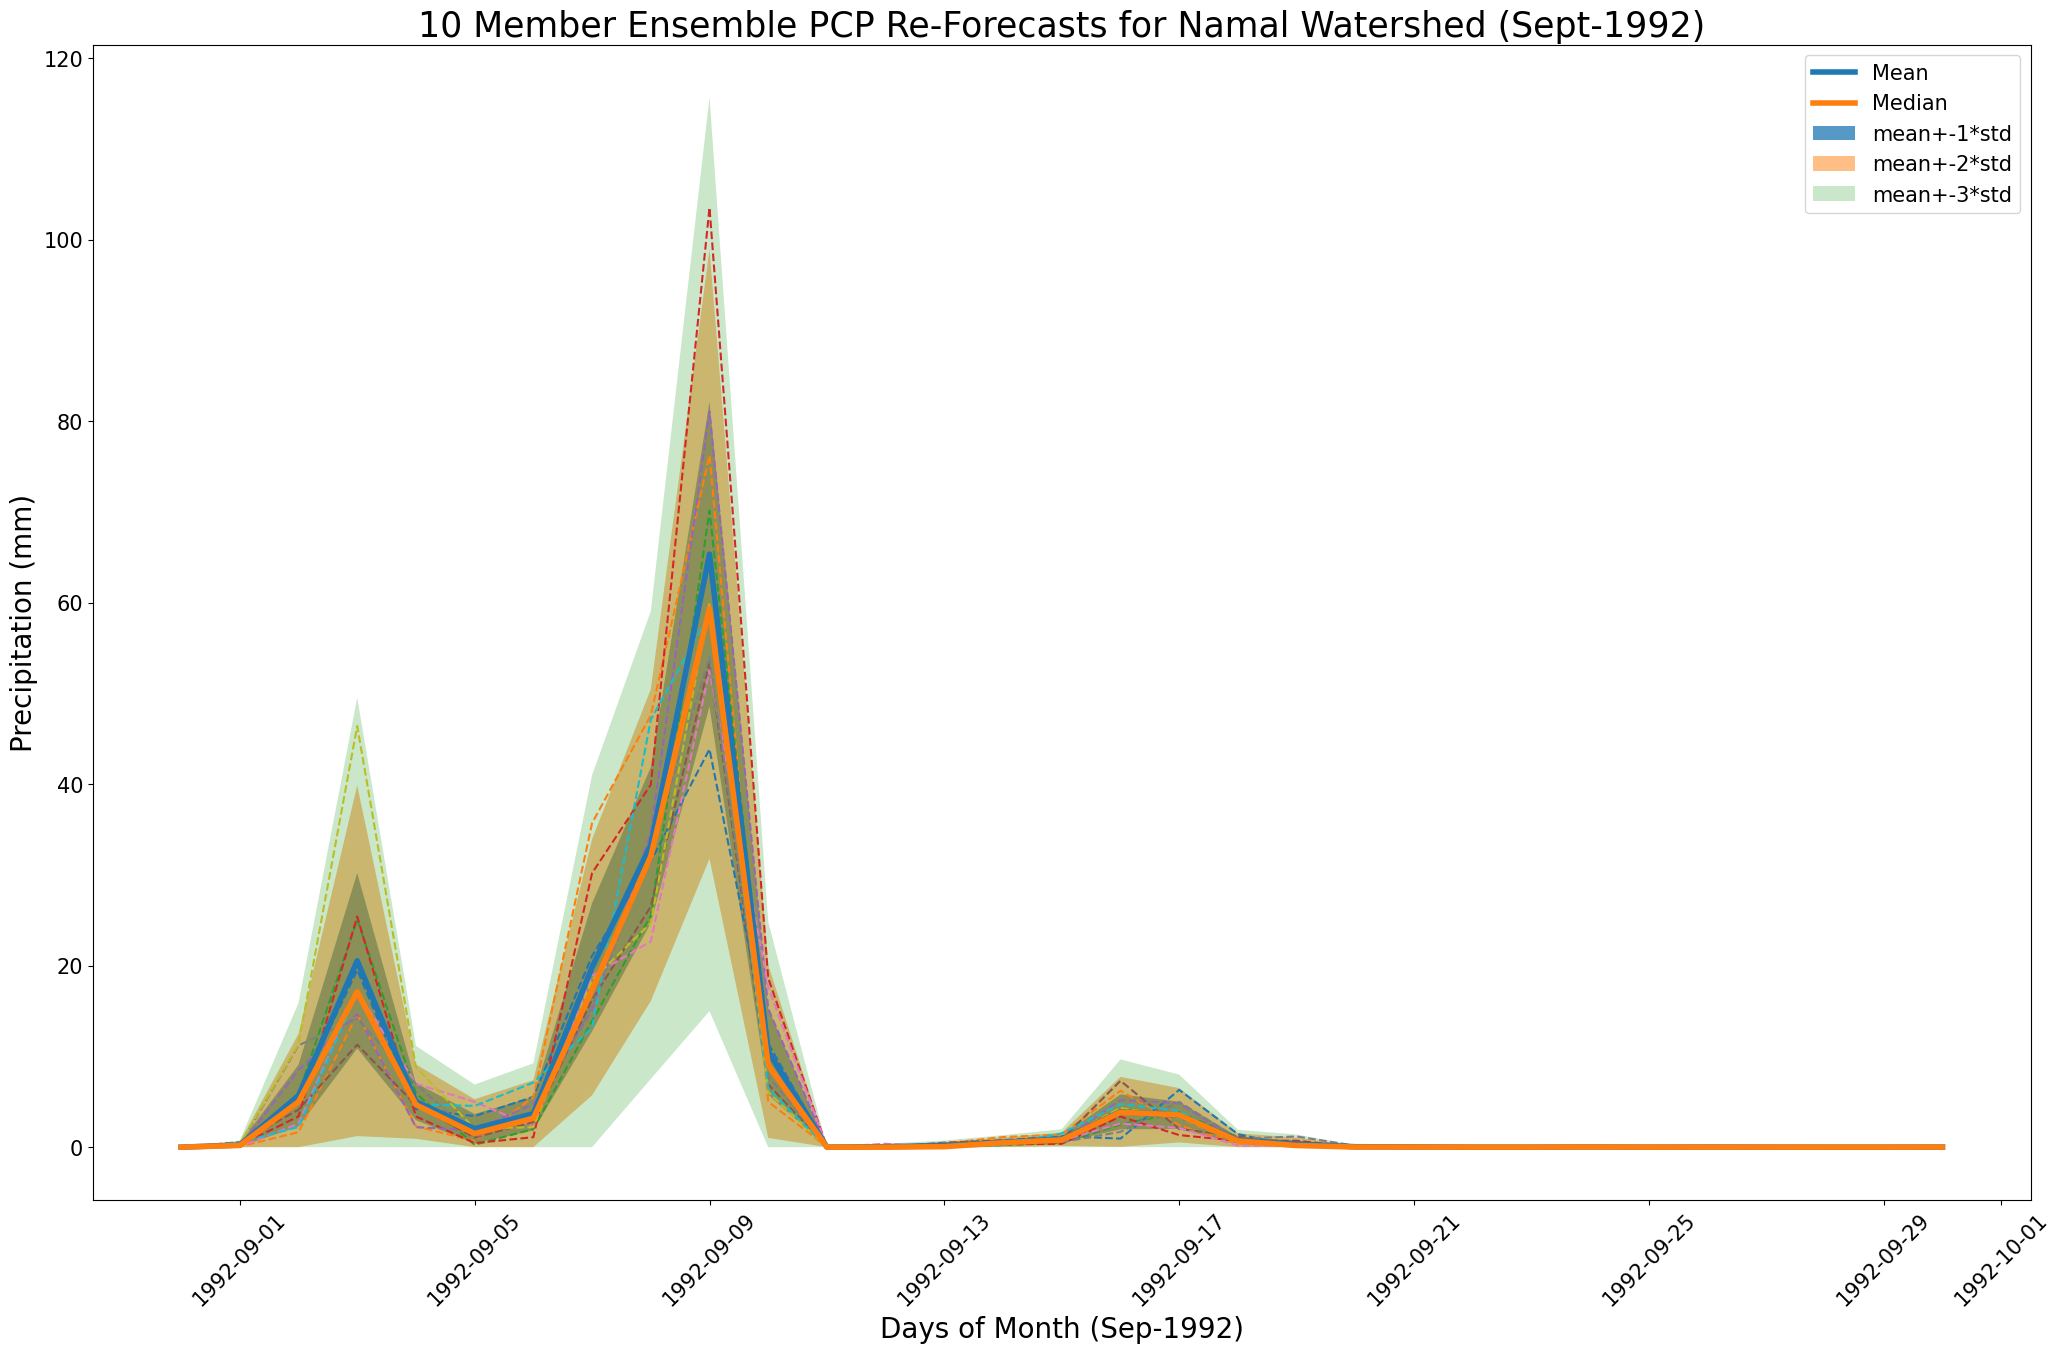

In [362]:
f = plt.figure()
f.set_figwidth(25)
f.set_figheight(15)
plt.plot(Ensemble_scenarios['Date'],Ensemble_scenarios['Flo_1'],'--',lw=1.5)
plt.plot(Ensemble_scenarios['Date'],Ensemble_scenarios['Flo_2'],'--',lw=1.5)
plt.plot(Ensemble_scenarios['Date'],Ensemble_scenarios['Flo_3'],'--',lw=1.5)
plt.plot(Ensemble_scenarios['Date'],Ensemble_scenarios['Flo_4'],'--',lw=1.5)
plt.plot(Ensemble_scenarios['Date'],Ensemble_scenarios['Flo_5'],'--',lw=1.5)
plt.plot(Ensemble_scenarios['Date'],Ensemble_scenarios['Flo_6'],'--',lw=1.5)
plt.plot(Ensemble_scenarios['Date'],Ensemble_scenarios['Flo_7'],'--',lw=1.5)
plt.plot(Ensemble_scenarios['Date'],Ensemble_scenarios['Flo_8'],'--',lw=1.5)
plt.plot(Ensemble_scenarios['Date'],Ensemble_scenarios['Flo_9'],'--',lw=1.5)
plt.plot(Ensemble_scenarios['Date'],Ensemble_scenarios['Flo_10'],'--',lw=1.5)
# plt.plot(dr,ef2_d,'--')
# plt.plot(dr,ef3_d,'--')
# plt.plot(dr,ef4_d,'--')
# plt.plot(dr,ef5_d,'--')
# plt.plot(dr,ef6_d,'--')
# plt.plot(dr,ef7_d,'--')
# plt.plot(dr,ef8_d,'--')
# plt.plot(dr,ef9_d,'--')
# plt.plot(dr,ef10_d,'--')
plt.plot(Ensemble_scenarios['Date'],mean, lw=4, label="Mean")
plt.plot(Ensemble_scenarios['Date'],med, lw=4, label="Median")
# plt.plot(Ensemble_scenarios['Date'],upper, lw=4)
plt.fill_between(Ensemble_scenarios['Date'],upper, lower, alpha=0.75, label="mean+-1*std")
plt.fill_between(Ensemble_scenarios['Date'],upper2, lower2, alpha=0.5, label="mean+-2*std")
plt.fill_between(Ensemble_scenarios['Date'],upper3, lower3, alpha=0.25, label="mean+-3*std")
# plt.plot(Ensemble_scenarios['Date'],lower, lw=4)
# plt.plot(Ensemble_scenarios['Date'],upper2, lw=4)
# plt.plot(Ensemble_scenarios['Date'],lower2, lw=4)
# plt.plot(Ensemble_scenarios['Date'],upper3, lw=4)
plt.xlabel("Days of Month (Sep-1992)", fontsize=20)
plt.ylabel("Precipitation (mm)", fontsize=20)
plt.title("10 Member Ensemble PCP Re-Forecasts for Namal Watershed (Sept-1992)", fontsize=25)

plt.xticks(rotation = 45, fontsize=15)
# plt.xticks(times.to_pydatetime())
# plt.locator_params(axis='x', nbins=10)
# plt.yticks(rotation = 45, fontsize=15)

plt.legend(fontsize=15)
plt.savefig('Ensemble Memeber with Spread.jpg', dpi=500)
plt.show()

In [383]:
pr = []
for j in range(30):
    sum = 0
    for i in range(10):
        sum = sum + ((scipy.stats.norm(mean[j+1],std[j+1]).pdf(Ensemble_scenarios.iloc[j+1,i+1])))
    for i in range(10):
        pr.append((scipy.stats.norm(mean[j+1],std[j+1]).pdf(Ensemble_scenarios.iloc[j+1,i+1]))/sum)
pr = np.array(pr)

In [436]:
pr1 = pr[0:10]
pr2 = pr[10:20]
pr3 = pr[20:30]
pr4 = pr[30:40]
pr5 = pr[40:50]
pr6 = pr[50:60]
pr7 = pr[60:70]
pr8 = pr[70:80]
pr9 = pr[80:90]
pr10 = pr[90:100]
pr11 = pr[100:110]
pr12 = pr[110:120]
pr13 = pr[120:130]
pr14 = pr[130:140]
pr15 = pr[140:150]
pr16 = pr[150:160]
pr17 = pr[160:170]
pr18 = pr[170:180]
pr19 = pr[180:190]
pr20 = pr[190:200]
pr21 = pr[200:210]
pr22 = pr[210:220]
pr23 = pr[220:230]
pr24 = pr[230:240]
pr25 = pr[240:250]
pr26 = pr[250:260]
pr27 = pr[260:270]
pr28 = pr[270:280]
pr29 = pr[280:290]
pr30 = pr[290:300]


In [442]:
P_1 = np.ones(30, dtype = float)
P_2 = np.ones(30, dtype = float)
P_3 = np.ones(30, dtype = float)
P_4 = np.ones(30, dtype = float)
P_5 = np.ones(30, dtype = float)
P_6 = np.ones(30, dtype = float)
P_7 = np.ones(30, dtype = float)
P_8 = np.ones(30, dtype = float)
P_9 = np.ones(30, dtype = float)
P_10 = np.ones(30, dtype = float)


In [445]:
for i in range(30):
    P_1[i] = pr[i*10]
    P_2[i] = pr[(i*10)+1]
    P_3[i] = pr[(i*10)+2]
    P_4[i] = pr[(i*10)+3]
    P_5[i] = pr[(i*10)+4]
    P_6[i] = pr[(i*10)+5]
    P_7[i] = pr[(i*10)+6]
    P_8[i] = pr[(i*10)+7]
    P_9[i] = pr[(i*10)+8]
    P_10[i] = pr[(i*10)+9]

In [458]:
np.size(P_1)

30

In [481]:

EF_with_prob = pd.DataFrame({'Date':dr,'Flo_1':ef1_d,'Flo_2':ef2_d,'Flo_3':ef3_d,'Flo_4':ef4_d,'Flo_5':ef5_d,'Flo_6':ef6_d,'Flo_7':ef7_d,'Flo_8':ef8_d,'Flo_9':ef9_d,'Flo_10':ef10_d,'Pr_1':P_1, 'Pr_2':P_2, 'Pr_3':P_3, 'Pr_4':P_4, 'Pr_5':P_5, 'Pr_6':P_6, 'Pr_7':P_7, 'Pr_8':P_8, 'Pr_9':P_9, 'Pr_10':P_10})


In [482]:
EF_with_prob

,Date,Flo_1,Flo_2,Flo_3,Flo_4,Flo_5,Flo_6,Flo_7,Flo_8,Flo_9,...,Pr_1,Pr_2,Pr_3,Pr_4,Pr_5,Pr_6,Pr_7,Pr_8,Pr_9,Pr_10
0,1992-09-01,0.186435,0.068665,0.239143,0.194996,0.046252,0.548829,0.068659,0.191652,0.295232,...,0.136851,0.087267,0.143116,0.138761,0.075837,0.026329,0.087264,0.138054,0.134953,0.031570
1,1992-09-02,5.886052,1.648905,5.887103,3.394061,8.491929,4.125210,2.583626,11.221547,11.333932,...,0.149370,0.074292,0.149368,0.119468,0.106447,0.134836,0.098996,0.039856,0.037753,0.089615
2,1992-09-03,19.521759,14.638622,25.088582,25.425349,14.658482,11.299262,17.166214,14.176385,46.409419,...,0.127927,0.106725,0.115178,0.113237,0.106859,0.081393,0.121018,0.103531,0.003576,0.120555
3,1992-09-04,4.202646,2.303340,5.932490,3.386926,2.198702,4.616942,7.004809,6.971832,8.822996,...,0.136470,0.061396,0.133695,0.107595,0.057303,0.144912,0.092276,0.093716,0.026309,0.146327
4,1992-09-05,3.420215,0.685203,0.265820,0.450009,1.875468,1.058020,4.990685,1.128057,2.012609,...,0.103397,0.104448,0.081284,0.091499,0.147666,0.123380,0.028310,0.126552,0.148433,0.045030
5,1992-09-06,5.549614,5.512927,1.996625,1.098995,4.739711,2.783667,2.256626,3.591597,2.215343,...,0.090732,0.092542,0.099281,0.056705,0.128067,0.133701,0.111751,0.150378,0.109816,0.027026
6,1992-09-07,21.084855,35.715939,13.908789,30.211666,15.109172,16.248381,18.870034,15.545989,18.423866,...,0.136198,0.010958,0.097342,0.046840,0.110660,0.121680,0.137115,0.115117,0.135672,0.088417
7,1992-09-08,31.506301,47.591623,25.529163,39.953657,34.685286,26.514635,22.682435,32.604662,24.699230,...,0.146123,0.037338,0.099300,0.110496,0.147338,0.109416,0.069686,0.148828,0.090580,0.040897
8,1992-09-09,43.860796,76.252398,70.154849,103.552916,81.071116,53.417217,52.519134,54.016087,59.973025,...,0.061806,0.113696,0.134729,0.010546,0.090564,0.108966,0.104746,0.111695,0.133299,0.129951
9,1992-09-10,11.432913,5.003650,10.254886,18.624531,15.283320,6.917568,17.649910,7.826328,6.074280,...,0.148992,0.076937,0.151263,0.036090,0.092579,0.113300,0.049979,0.128681,0.097455,0.104724


In [484]:
EF_with_prob.to_csv("EF_PCP_Pr.csv", index=False)